# USER RETENTION

In [1]:
# IMPORTING LIBRARY

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# DATA IMPORTING

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/user_retention_complex_with_transaction.csv')

df.head()

Mounted at /content/drive


,user_id,event_date,event_type,platform,purchase_value,session_duration,device_type,region,num_items,product_category,payment_method,transaction_status,transaction_id
0,202,2023-01-01 00:00:00,visit,mobile,NaN,538.0,Android,Medan,NaN,NaN,NaN,NaN,NaN
1,448,2023-01-01 01:00:00,visit,web,NaN,470.0,PC,Medan,NaN,NaN,NaN,NaN,NaN
2,370,2023-01-01 02:00:00,visit,web,NaN,151.0,iOS,Surabaya,NaN,NaN,NaN,NaN,NaN
3,206,2023-01-01 03:00:00,visit,app,NaN,446.0,PC,Jakarta,NaN,NaN,NaN,NaN,NaN
4,171,2023-01-01 04:00:00,purchase,mobile,325.13,564.0,Android,Semarang,3.0,Fashion,E-Wallet,Completed,727685.0


In [3]:
# DATA TYPE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5100 non-null   int64  
 1   event_date          5100 non-null   object 
 2   event_type          5100 non-null   object 
 3   platform            5100 non-null   object 
 4   purchase_value      1549 non-null   float64
 5   session_duration    4893 non-null   float64
 6   device_type         5100 non-null   object 
 7   region              5100 non-null   object 
 8   num_items           1549 non-null   float64
 9   product_category    1549 non-null   object 
 10  payment_method      1549 non-null   object 
 11  transaction_status  1782 non-null   object 
 12  transaction_id      1782 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 518.1+ KB


In [4]:
print(df['transaction_status'].unique())
print(df['event_type'].unique())

[nan 'Completed' 'Failed' 'Refunded' 'Pending']
['visit' 'purchase' 'add_to_cart' 'refund']


In [5]:
# DATA CLEANING

df_clean = df.copy()
df_clean = df_clean[~df_clean['purchase_value'].isna()]
df_clean = df_clean[~df_clean['session_duration'].isna()]
df_clean = df_clean[~df_clean['num_items'].isna()]
df_clean = df_clean[~df_clean['product_category'].isna()]
df_clean = df_clean[~df_clean['payment_method'].isna()]
df_clean = df_clean[~df_clean['transaction_status'].isna()]
df_clean = df_clean[~df_clean['transaction_id'].isna()]

df_clean['event_date'] = df_clean['event_date'].astype('datetime64[ns]')
df_clean['year_month'] = df_clean['event_date'].dt.to_period('M')

df_clean = df_clean[df_clean['transaction_status']=='Completed']
df_clean = df_clean[df_clean['event_type']=='purchase']

df_clean = df_clean.reset_index(drop=True)

df_clean

,user_id,event_date,event_type,platform,purchase_value,session_duration,device_type,region,num_items,product_category,payment_method,transaction_status,transaction_id,year_month
0,171,2023-01-01 04:00:00,purchase,mobile,325.13,564.0,Android,Semarang,3.0,Fashion,E-Wallet,Completed,727685.0,2023-01
1,221,2023-01-01 08:00:00,purchase,web,639.52,509.0,Android,Surabaya,2.0,Beauty,E-Wallet,Completed,807273.0,2023-01
2,230,2023-01-01 16:00:00,purchase,app,368.61,580.0,PC,Surabaya,3.0,Groceries,E-Wallet,Completed,745574.0,2023-01
3,249,2023-01-01 17:00:00,purchase,web,225.29,874.0,Android,Bali,5.0,Electronics,COD,Completed,736796.0,2023-01
4,443,2023-01-01 20:00:00,purchase,app,404.42,231.0,PC,Surabaya,6.0,Beauty,Bank Transfer,Completed,539093.0,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,326,2023-03-10 03:00:00,purchase,web,729.21,178.0,PC,Medan,2.0,Beauty,COD,Completed,535289.0,2023-03
1184,484,2023-04-11 05:00:00,purchase,web,602.48,887.0,iOS,Semarang,3.0,Groceries,Bank Transfer,Completed,894306.0,2023-04
1185,106,2023-01-29 00:00:00,purchase,web,574.13,143.0,Android,Semarang,4.0,Groceries,COD,Completed,168308.0,2023-01
1186,287,2023-06-03 11:00:00,purchase,web,619.15,754.0,iOS,Surabaya,3.0,Beauty,E-Wallet,Completed,336087.0,2023-06


**table of user monthly**

In [6]:
df_user_monthly = df_clean.groupby(['user_id','year_month'], as_index=False).agg(order_count=('transaction_id','nunique'))
df_user_monthly

,user_id,year_month,order_count
0,100,2023-01,1
1,100,2023-07,1
2,101,2023-03,2
3,101,2023-05,1
4,101,2023-07,1
...,...,...,...
943,498,2023-02,1
944,498,2023-03,1
945,499,2023-01,1
946,499,2023-02,1


In [7]:
df_user_monthly['cohort'] = df_user_monthly.groupby('user_id')['year_month'].transform('min')

df_user_monthly

,user_id,year_month,order_count,cohort
0,100,2023-01,1,2023-01
1,100,2023-07,1,2023-01
2,101,2023-03,2,2023-03
3,101,2023-05,1,2023-03
4,101,2023-07,1,2023-03
...,...,...,...,...
943,498,2023-02,1,2023-02
944,498,2023-03,1,2023-02
945,499,2023-01,1,2023-01
946,499,2023-02,1,2023-01


In [8]:
from operator import attrgetter

df_user_monthly['period_num'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1

df_user_monthly

,user_id,year_month,order_count,cohort,period_num
0,100,2023-01,1,2023-01,1
1,100,2023-07,1,2023-01,7
2,101,2023-03,2,2023-03,1
3,101,2023-05,1,2023-03,3
4,101,2023-07,1,2023-03,5
...,...,...,...,...,...
943,498,2023-02,1,2023-02,1
944,498,2023-03,1,2023-02,2
945,499,2023-01,1,2023-01,1
946,499,2023-02,1,2023-01,2


**cohort table**

In [9]:
df_cohort_pivot = pd.pivot_table(
    df_user_monthly,
    values = 'user_id',
    index = 'cohort',
    columns = 'period_num',
    aggfunc = {'user_id':'nunique'}
)

df_cohort_pivot

period_num,1,2,3,4,5,6,7
cohort,,,,,,,
2023-01,142.0,52.0,46.0,43.0,54.0,52.0,46.0
2023-02,71.0,23.0,24.0,21.0,19.0,21.0,NaN
2023-03,75.0,18.0,24.0,21.0,31.0,NaN,NaN
2023-04,39.0,18.0,15.0,12.0,NaN,NaN,NaN
2023-05,30.0,10.0,12.0,NaN,NaN,NaN,NaN
2023-06,13.0,6.0,NaN,NaN,NaN,NaN,NaN
2023-07,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cohort_size = df_cohort_pivot.iloc[:,0]

cohort_size

,1
cohort,
2023-01,142.0
2023-02,71.0
2023-03,75.0
2023-04,39.0
2023-05,30.0
2023-06,13.0
2023-07,10.0


In [11]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size,axis=0)
df_retention_cohort

period_num,1,2,3,4,5,6,7
cohort,,,,,,,
2023-01,1.0,0.366197,0.323944,0.302817,0.380282,0.366197,0.323944
2023-02,1.0,0.323944,0.338028,0.295775,0.267606,0.295775,NaN
2023-03,1.0,0.240000,0.320000,0.280000,0.413333,NaN,NaN
2023-04,1.0,0.461538,0.384615,0.307692,NaN,NaN,NaN
2023-05,1.0,0.333333,0.400000,NaN,NaN,NaN,NaN
2023-06,1.0,0.461538,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,NaN,NaN,NaN,NaN,NaN,NaN


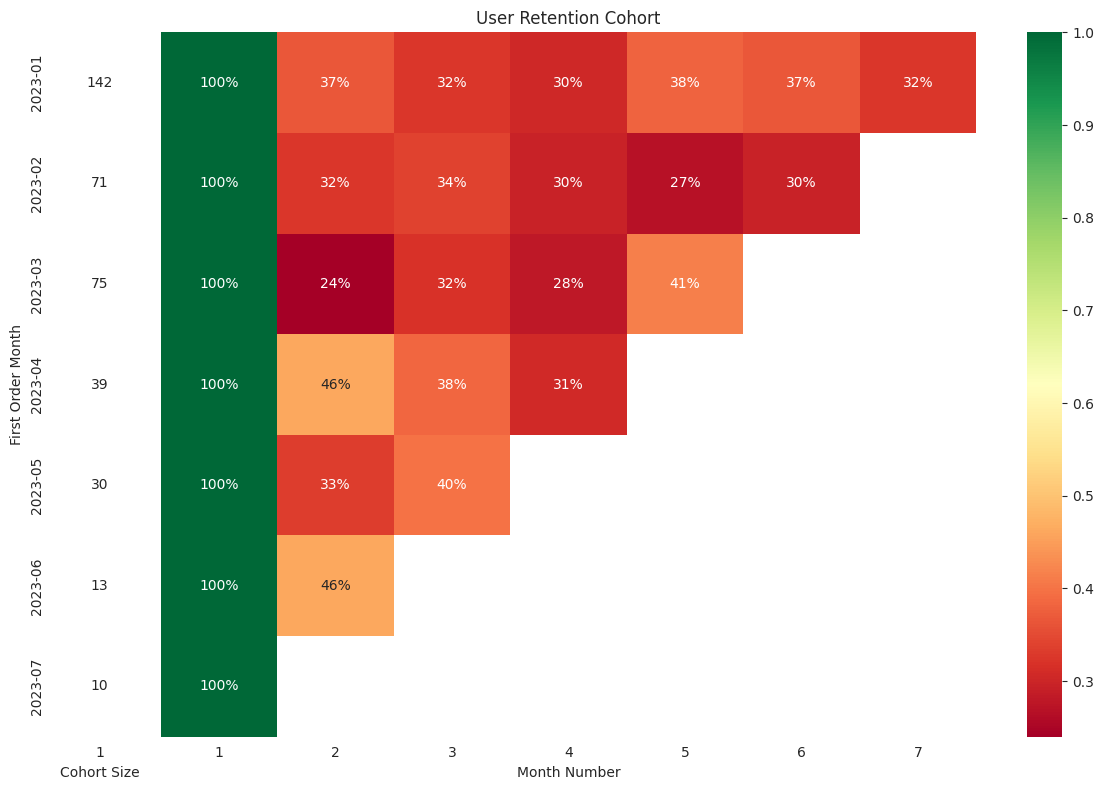

In [12]:
with sns.axes_style('white'):

  fig, ax = plt.subplots(1, 2, figsize=(12,8), sharey=True, gridspec_kw={'width_ratios':[1,11]})

  # user retention cohort
  sns.heatmap(df_retention_cohort, annot=True, fmt ='.0%', cmap = 'RdYlGn', ax=ax[1])
  ax[1].set_title('User Retention Cohort')
  ax[1].set(xlabel = 'Month Number', ylabel = '')

  # cohort size
  df_cohort_size = pd.DataFrame(cohort_size)
  white_cmap = mcolors.ListedColormap(['white'])
  sns.heatmap(df_cohort_size, annot=True, cbar= False, fmt = 'g', cmap=white_cmap, ax=ax[0])
  ax[0].tick_params(bottom=False)
  ax[0].set(xlabel='Cohort Size', ylabel='First Order Month')

  fig.tight_layout()

# USER SEGMENTATION

In [13]:
# adding order_date and amount columns

df_clean['order_date'] = df_clean['event_date'].dt.date
df_clean['amount'] = df_clean['purchase_value']*df_clean['num_items']

df_clean

,user_id,event_date,event_type,platform,purchase_value,session_duration,device_type,region,num_items,product_category,payment_method,transaction_status,transaction_id,year_month,order_date,amount
0,171,2023-01-01 04:00:00,purchase,mobile,325.13,564.0,Android,Semarang,3.0,Fashion,E-Wallet,Completed,727685.0,2023-01,2023-01-01,975.39
1,221,2023-01-01 08:00:00,purchase,web,639.52,509.0,Android,Surabaya,2.0,Beauty,E-Wallet,Completed,807273.0,2023-01,2023-01-01,1279.04
2,230,2023-01-01 16:00:00,purchase,app,368.61,580.0,PC,Surabaya,3.0,Groceries,E-Wallet,Completed,745574.0,2023-01,2023-01-01,1105.83
3,249,2023-01-01 17:00:00,purchase,web,225.29,874.0,Android,Bali,5.0,Electronics,COD,Completed,736796.0,2023-01,2023-01-01,1126.45
4,443,2023-01-01 20:00:00,purchase,app,404.42,231.0,PC,Surabaya,6.0,Beauty,Bank Transfer,Completed,539093.0,2023-01,2023-01-01,2426.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,326,2023-03-10 03:00:00,purchase,web,729.21,178.0,PC,Medan,2.0,Beauty,COD,Completed,535289.0,2023-03,2023-03-10,1458.42
1184,484,2023-04-11 05:00:00,purchase,web,602.48,887.0,iOS,Semarang,3.0,Groceries,Bank Transfer,Completed,894306.0,2023-04,2023-04-11,1807.44
1185,106,2023-01-29 00:00:00,purchase,web,574.13,143.0,Android,Semarang,4.0,Groceries,COD,Completed,168308.0,2023-01,2023-01-29,2296.52
1186,287,2023-06-03 11:00:00,purchase,web,619.15,754.0,iOS,Surabaya,3.0,Beauty,E-Wallet,Completed,336087.0,2023-06,2023-06-03,1857.45


**RFM table**

In [14]:
df_user = df_clean.groupby('user_id', as_index=False).agg(order_cnt = ('transaction_id','nunique'),
                                          max_order_date = ('order_date','max'),
                                          total_order_value = ('amount','sum')).sort_values('user_id',ascending=True)

df_user

,user_id,order_cnt,max_order_date,total_order_value
0,100,2,2023-07-11,6492.96
1,101,4,2023-07-17,15627.96
2,102,2,2023-05-03,1544.44
3,103,2,2023-03-09,1061.98
4,104,5,2023-07-15,17015.31
...,...,...,...,...
375,495,1,2023-02-21,2226.69
376,496,3,2023-05-30,3498.31
377,497,3,2023-02-28,9673.73
378,498,2,2023-03-30,3405.83


In [15]:
today = max(df_clean['order_date'])

df_user['day_since_last_order'] = pd.to_timedelta(today - df_user['max_order_date']).dt.days

df_user

,user_id,order_cnt,max_order_date,total_order_value,day_since_last_order
0,100,2,2023-07-11,6492.96,17
1,101,4,2023-07-17,15627.96,11
2,102,2,2023-05-03,1544.44,86
3,103,2,2023-03-09,1061.98,141
4,104,5,2023-07-15,17015.31,13
...,...,...,...,...,...
375,495,1,2023-02-21,2226.69,157
376,496,3,2023-05-30,3498.31,59
377,497,3,2023-02-28,9673.73,150
378,498,2,2023-03-30,3405.83,120


In [16]:
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'],
                                  bins = [
                                      df_user['day_since_last_order'].min(),
                                      np.percentile(df_user['day_since_last_order'], 20),
                                      np.percentile(df_user['day_since_last_order'], 40),
                                      np.percentile(df_user['day_since_last_order'], 60),
                                      np.percentile(df_user['day_since_last_order'], 80),
                                      df_user['day_since_last_order'].max(),
                                  ],
                                  labels = [5,4,3,2,1],
                                  include_lowest=True).astype(int)

df_user

# The data is divided into 5 equal parts
# Each part is approximately 20% of the population

,user_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score
0,100,2,2023-07-11,6492.96,17,4
1,101,4,2023-07-17,15627.96,11,5
2,102,2,2023-05-03,1544.44,86,2
3,103,2,2023-03-09,1061.98,141,1
4,104,5,2023-07-15,17015.31,13,5
...,...,...,...,...,...,...
375,495,1,2023-02-21,2226.69,157,1
376,496,3,2023-05-30,3498.31,59,2
377,497,3,2023-02-28,9673.73,150,1
378,498,2,2023-03-30,3405.83,120,1


In [17]:
df_user['frequency_score'] = pd.cut(df_user['order_cnt'],
                              bins=[
                                  df_user['order_cnt'].min(),
                                  np.percentile(df_user['order_cnt'],25),
                                  np.percentile(df_user['order_cnt'],50),
                                  np.percentile(df_user['order_cnt'],75),
                                  np.percentile(df_user['order_cnt'],90),
                                  df_user['order_cnt'].max()],
                              labels= [1,2,3,4,5],
                              include_lowest=True).astype(int)

df_user

,user_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score
0,100,2,2023-07-11,6492.96,17,4,1
1,101,4,2023-07-17,15627.96,11,5,3
2,102,2,2023-05-03,1544.44,86,2,1
3,103,2,2023-03-09,1061.98,141,1,1
4,104,5,2023-07-15,17015.31,13,5,4
...,...,...,...,...,...,...,...
375,495,1,2023-02-21,2226.69,157,1,1
376,496,3,2023-05-30,3498.31,59,2,2
377,497,3,2023-02-28,9673.73,150,1,2
378,498,2,2023-03-30,3405.83,120,1,1


**segmentation**

In [18]:
df_user['monetery_score'] = pd.cut(df_user['total_order_value'],
                            bins=[
                                df_user['total_order_value'].min(),
                                np.percentile(df_user['total_order_value'], 20),
                                np.percentile(df_user['total_order_value'], 40),
                                np.percentile(df_user['total_order_value'], 60),
                                np.percentile(df_user['total_order_value'], 80),
                                df_user['total_order_value'].max()
                            ],
                            labels=[1,2,3,4,5],
                            include_lowest=True).astype(int)
df_user

,user_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetery_score
0,100,2,2023-07-11,6492.96,17,4,1,3
1,101,4,2023-07-17,15627.96,11,5,3,5
2,102,2,2023-05-03,1544.44,86,2,1,1
3,103,2,2023-03-09,1061.98,141,1,1,1
4,104,5,2023-07-15,17015.31,13,5,4,5
...,...,...,...,...,...,...,...,...
375,495,1,2023-02-21,2226.69,157,1,1,1
376,496,3,2023-05-30,3498.31,59,2,2,2
377,497,3,2023-02-28,9673.73,150,1,2,4
378,498,2,2023-03-30,3405.83,120,1,1,2


In [19]:
df_user['segment'] = np.select([(df_user['recency_score']==5) &  (df_user['frequency_score'] >= 4),
                                (df_user['recency_score'].between(3,4)) &  (df_user['frequency_score'] >= 4),
                                (df_user['recency_score'].between(4,5)) &  (df_user['frequency_score'].between(2,3)),
                                (df_user['recency_score'].between(1,2)) &  (df_user['frequency_score'] == 5),
                                (df_user['recency_score']==3) &  (df_user['frequency_score'] == 3),
                                (df_user['recency_score']==5) &  (df_user['frequency_score'] == 1),
                                (df_user['recency_score']==4) &  (df_user['frequency_score'] == 1),
                                (df_user['recency_score'].between(1,2)) &  (df_user['frequency_score'].between(3,4)),
                                (df_user['recency_score']==3) &  (df_user['frequency_score'].between(1,2)),
                                (df_user['recency_score']<=2) &  (df_user['frequency_score'] <= 2)],
                                ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists',
                                "04-Can't Lose Them", '05-Need Attention','06-New Customers',
                                '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating'], default='Others')
df_user

,user_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetery_score,segment
0,100,2,2023-07-11,6492.96,17,4,1,3,07-Promising
1,101,4,2023-07-17,15627.96,11,5,3,5,03-Potential Loyalists
2,102,2,2023-05-03,1544.44,86,2,1,1,10-Hibernating
3,103,2,2023-03-09,1061.98,141,1,1,1,10-Hibernating
4,104,5,2023-07-15,17015.31,13,5,4,5,01-Champion
...,...,...,...,...,...,...,...,...,...
375,495,1,2023-02-21,2226.69,157,1,1,1,10-Hibernating
376,496,3,2023-05-30,3498.31,59,2,2,2,10-Hibernating
377,497,3,2023-02-28,9673.73,150,1,2,4,10-Hibernating
378,498,2,2023-03-30,3405.83,120,1,1,2,10-Hibernating


In [20]:
import warnings
warnings.filterwarnings('ignore')

df_segmentation = pd.pivot_table(df_user,
                                 index = 'segment',
                                 values = ['user_id','order_cnt','day_since_last_order','total_order_value'],
                                 aggfunc = {
                                     'order_cnt':[np.mean,np.median],
                                     'day_since_last_order':[np.mean,np.median],
                                     'total_order_value':[np.mean,np.median, 'sum'],
                                     'user_id':'nunique',

                                 })
df_segmentation['%'] = (df_segmentation['user_id']/df_segmentation['user_id'].sum())*100
df_segmentation.round(1)

day_since_last_order        order_cnt         \
                                       mean median      mean median   
segment                                                               
01-Champion                             7.5    8.0       6.2    5.0   
02-Loyal Customers                     34.5   35.0       5.7    5.0   
03-Potential Loyalists                 13.2   11.0       3.4    3.0   
04-Can't Lose Them                     79.4   76.0       6.4    6.0   
05-Need Attention                      41.8   41.0       4.0    4.0   
06-New Customers                        5.2    5.0       1.8    2.0   
07-Promising                           22.2   24.0       1.7    2.0   
08-At Risk                             73.1   70.0       4.1    4.0   
09-About to Sleep                      41.8   41.0       2.4    3.0   
10-Hibernating                        112.9  109.5       2.0    2.0   

                       total_order_value                    user_id     %  
                                    mean   median       sum nunique        
segment                                                                    
01-Champion                      13628.4  12301.1  313453.4      23   6.1  
02-Loyal Customers               13871.3  13193.1  499368.1      36   9.5  
03-Potential Loyalists            8781.5   8259.8  676177.0      77  20.3  
04-Can't Lose Them               11952.1  12583.7   59760.6       5   1.3  
05-Need Attention                10084.7   9182.7  110932.1      11   2.9  
06-New Customers                  4362.3   3278.8   34898.6       8   2.1  
07-Promising                      3731.0   3119.0  115661.9      31   8.2  
08-At Risk                       10819.4   9089.0  238026.4      22   5.8  
09-About to Sleep                 6656.9   6777.0  286246.2      43  11.3  
10-Hibernating                    5429.7   4628.4  673277.0     124  32.6